In [226]:
#!pip install requests
#!pip install dotenv

In [812]:
import requests
import json
import pandas as pd
from pandas import json_normalize 
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
import numpy as np
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import  linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
import pickle 
from sklearn.model_selection import GridSearchCV


In [813]:
#url = "https://alsi.gie.eu/api/data/21W0000000001245/BE/21X000000001006T"
#url = "https://agsi.gie.eu/api/data/eu"
url_eu = "https://alsi.gie.eu/api/data/eu"
url_pt = "https://alsi.gie.eu/api/data/pt"
url_be = "https://alsi.gie.eu/api/data/be"
url_it = "https://alsi.gie.eu/api/data/it"
url_nl = "https://alsi.gie.eu/api/data/nl"
url_es = "https://alsi.gie.eu/api/data/es"
url_fr = "https://alsi.gie.eu/api/data/fr"
url_gb = "https://alsi.gie.eu/api/data/gb"
url_gr = "https://alsi.gie.eu/api/data/gr"
url_hr = "https://alsi.gie.eu/api/data/hr"
url_lt = "https://alsi.gie.eu/api/data/lt"
url_pl = "https://alsi.gie.eu/api/data/pl"


#url = "https://agsi.gie.eu/api/data/be?from=2020-06-01&till=2021-04-20"
#https://agsi.gie.eu/api/data/eu?from=2017-06-01&till=2017-06-14"

In [814]:
headers={'x-key':'2a813410c2ee7c9a690bb4d9d0e3a0a0'}

In [815]:
resp_eu = requests.get(url_eu,headers=headers)
resp_pt = requests.get(url_pt,headers=headers)
resp_be = requests.get(url_be,headers=headers)
resp_it = requests.get(url_it,headers=headers)
resp_nl = requests.get(url_nl,headers=headers)
resp_es = requests.get(url_es,headers=headers)
resp_fr = requests.get(url_fr,headers=headers)
resp_gb = requests.get(url_gb,headers=headers)
resp_gr = requests.get(url_gr,headers=headers)
resp_hr = requests.get(url_hr,headers=headers)
resp_lt = requests.get(url_lt,headers=headers)
resp_pl = requests.get(url_pl,headers=headers)

In [816]:
print(resp_eu.status_code)

200


In [817]:
print(resp_eu.content)

b'[{"status":"E","gasDayStartedOn":"2022-04-23","lngInventory":"4280.18","sendOut":"3636.3","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"E","gasDayStartedOn":"2022-04-22","lngInventory":"4638.21","sendOut":"3893.4","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"E","gasDayStartedOn":"2022-04-21","lngInventory":"4431.33","sendOut":"3817.6","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"E","gasDayStartedOn":"2022-04-20","lngInventory":"4848.66","sendOut":"3697.0","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"E","gasDayStartedOn":"2022-04-19","lngInventory":"4817.68","sendOut":"3577.0","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"C","gasDayStartedOn":"2022-04-18","lngInventory":"4793.66","sendOut":"3601.3","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"C","gasDayStartedOn":"2022-04-17","lngInventory":"4310.52","sendOut":"3451.5","dtmi":"7464.07","dtrs":"5600.3","info":[]},{"status":"E","gasDayStartedOn":"2022-04-16","lngInventory":"3967.

In [818]:
data_eu = resp_eu.text
data_pt = resp_pt.text
data_be = resp_be.text
data_it = resp_it.text
data_nl = resp_nl.text
data_es = resp_es.text
data_fr = resp_fr.text
data_gb = resp_gb.text
data_gr = resp_gr.text
data_hr = resp_hr.text
data_lt = resp_lt.text
data_pl = resp_pl.text

#data = resp.text
#data

In [819]:
df_eu = pd.read_json(data_eu)
df_pt = pd.read_json(data_pt)
df_be = pd.read_json(data_be)
df_it = pd.read_json(data_it)
df_nl = pd.read_json(data_nl)
df_es = pd.read_json(data_es)
df_fr = pd.read_json(data_fr)
df_gb = pd.read_json(data_gb)
df_gr = pd.read_json(data_gr)
df_hr = pd.read_json(data_hr)
df_lt = pd.read_json(data_lt)
df_pl = pd.read_json(data_pl)

df_eu


,status,gasDayStartedOn,lngInventory,sendOut,dtmi,dtrs,info
0,E,2022-04-23,4280.18,3636.3,7464.07,5600.3,[]
1,E,2022-04-22,4638.21,3893.4,7464.07,5600.3,[]
2,E,2022-04-21,4431.33,3817.6,7464.07,5600.3,[]
3,E,2022-04-20,4848.66,3697.0,7464.07,5600.3,[]
4,E,2022-04-19,4817.68,3577.0,7464.07,5600.3,[]
...,...,...,...,...,...,...,...
3762,C,2012-01-04,3496.63,2196.3,7620.94,5629.1,[]
3763,C,2012-01-03,3797.68,2193.3,7620.94,5629.1,[]
3764,C,2012-01-02,4038.22,1913.1,7620.94,5629.1,[]
3765,C,2012-01-01,3914.31,1791.8,7620.94,5629.1,[]


In [820]:
df_eu = df_eu.iloc[::-1] #reversed rows
df_pt = df_pt.iloc[::-1] #reversed rows
df_be = df_be.iloc[::-1] #reversed rows
df_it = df_it.iloc[::-1] #reversed rows
df_nl = df_nl.iloc[::-1] #reversed rows
df_es = df_es.iloc[::-1] #reversed rows
df_fr = df_fr.iloc[::-1] #reversed rows
df_gb = df_gb.iloc[::-1] #reversed rows
df_gr = df_gr.iloc[::-1] #reversed rows
df_hr = df_hr.iloc[::-1] #reversed rows
df_lt = df_lt.iloc[::-1] #reversed rows
df_pl = df_pl.iloc[::-1] #reversed rows

df_eu

,status,gasDayStartedOn,lngInventory,sendOut,dtmi,dtrs,info
3766,C,2011-12-31,977.94,737.9,2570.40,2203.7,[]
3765,C,2012-01-01,3914.31,1791.8,7620.94,5629.1,[]
3764,C,2012-01-02,4038.22,1913.1,7620.94,5629.1,[]
3763,C,2012-01-03,3797.68,2193.3,7620.94,5629.1,[]
3762,C,2012-01-04,3496.63,2196.3,7620.94,5629.1,[]
...,...,...,...,...,...,...,...
4,E,2022-04-19,4817.68,3577.0,7464.07,5600.3,[]
3,E,2022-04-20,4848.66,3697.0,7464.07,5600.3,[]
2,E,2022-04-21,4431.33,3817.6,7464.07,5600.3,[]
1,E,2022-04-22,4638.21,3893.4,7464.07,5600.3,[]


In [821]:
df_eu

,status,gasDayStartedOn,lngInventory,sendOut,dtmi,dtrs,info
3766,C,2011-12-31,977.94,737.9,2570.40,2203.7,[]
3765,C,2012-01-01,3914.31,1791.8,7620.94,5629.1,[]
3764,C,2012-01-02,4038.22,1913.1,7620.94,5629.1,[]
3763,C,2012-01-03,3797.68,2193.3,7620.94,5629.1,[]
3762,C,2012-01-04,3496.63,2196.3,7620.94,5629.1,[]
...,...,...,...,...,...,...,...
4,E,2022-04-19,4817.68,3577.0,7464.07,5600.3,[]
3,E,2022-04-20,4848.66,3697.0,7464.07,5600.3,[]
2,E,2022-04-21,4431.33,3817.6,7464.07,5600.3,[]
1,E,2022-04-22,4638.21,3893.4,7464.07,5600.3,[]


In [822]:
N = 1 
df_eu = df_eu.iloc[N: , :] #drop first N rows of dataframe
df_eu

,status,gasDayStartedOn,lngInventory,sendOut,dtmi,dtrs,info
3765,C,2012-01-01,3914.31,1791.8,7620.94,5629.1,[]
3764,C,2012-01-02,4038.22,1913.1,7620.94,5629.1,[]
3763,C,2012-01-03,3797.68,2193.3,7620.94,5629.1,[]
3762,C,2012-01-04,3496.63,2196.3,7620.94,5629.1,[]
3761,C,2012-01-05,3458.69,2061.9,7620.94,5629.1,[]
...,...,...,...,...,...,...,...
4,E,2022-04-19,4817.68,3577.0,7464.07,5600.3,[]
3,E,2022-04-20,4848.66,3697.0,7464.07,5600.3,[]
2,E,2022-04-21,4431.33,3817.6,7464.07,5600.3,[]
1,E,2022-04-22,4638.21,3893.4,7464.07,5600.3,[]


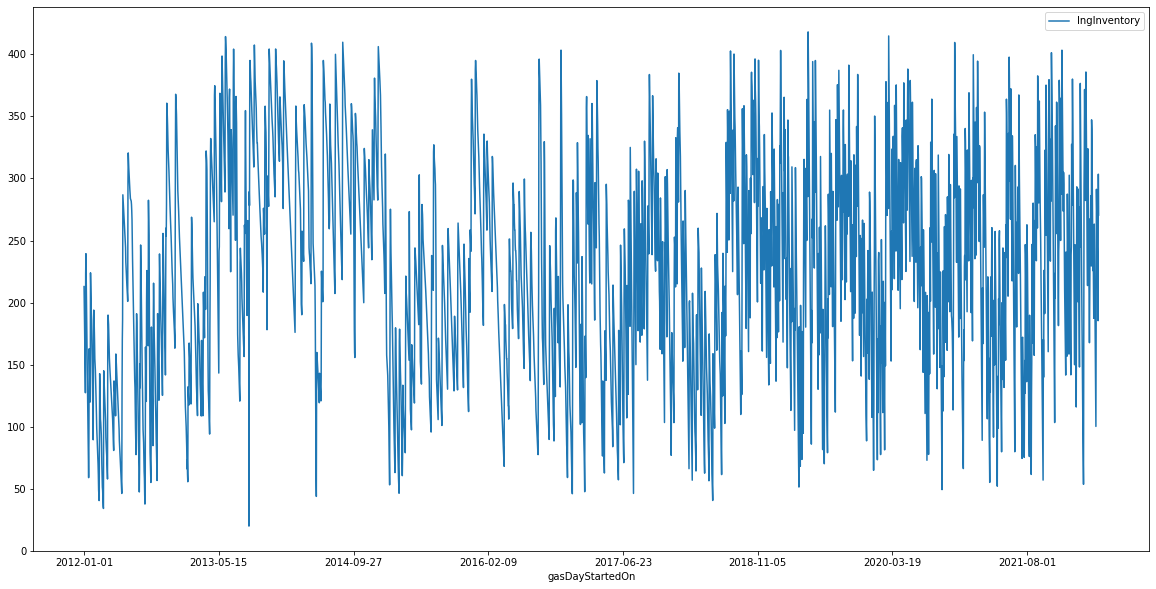

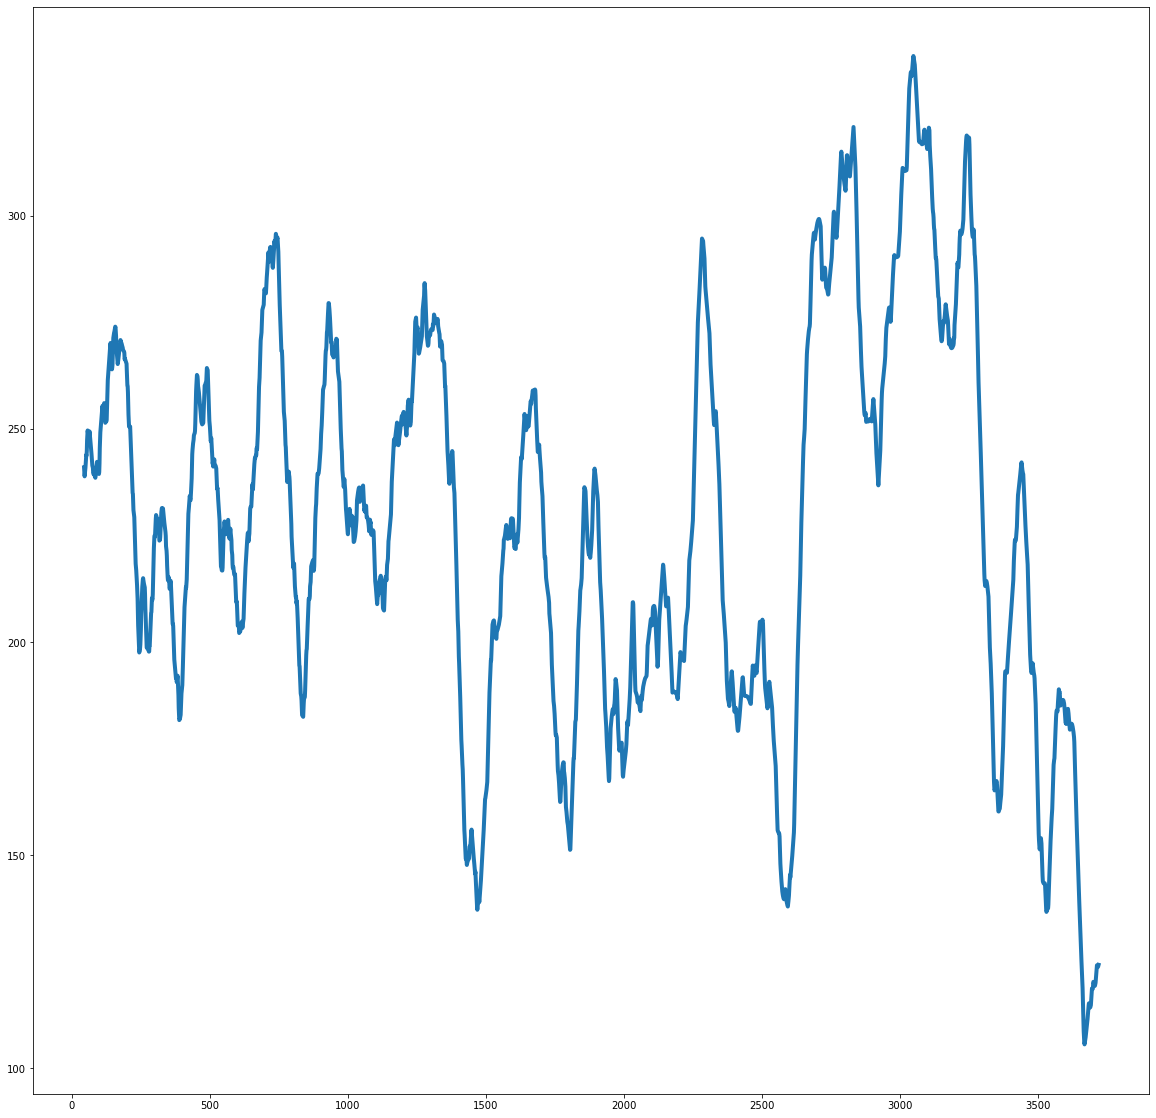

<Figure size 1440x1440 with 0 Axes>

In [823]:
df_pt.plot(x='gasDayStartedOn', y='lngInventory',figsize=(20, 10))
plt.figure(figsize=(20, 20))
plt.plot(df_pt.lngInventory.rolling(90,center=True).mean(), lw=4)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.show()

<AxesSubplot:>

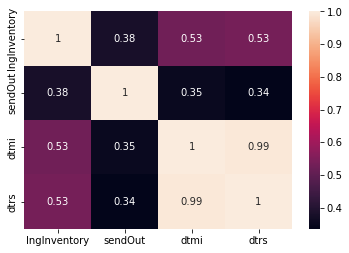

In [824]:
corrMatrix = df_eu.corr()
sn.heatmap(corrMatrix, annot=True)


In [825]:
#df_pt["lngInventory"]
#df_eu = df_eu.join(df_pt["lngInventory"])
#df_eu
df_eu = df_eu.join(df_pt["lngInventory"], rsuffix='_pt')
df_eu = df_eu.join(df_be["lngInventory"], rsuffix='_be')
df_eu = df_eu.join(df_it["lngInventory"], rsuffix='_it')
df_eu = df_eu.join(df_nl["lngInventory"], rsuffix='_nl')
df_eu = df_eu.join(df_es["lngInventory"], rsuffix='_es')
df_eu = df_eu.join(df_fr["lngInventory"], rsuffix='_fr')
df_eu = df_eu.join(df_gb["lngInventory"], rsuffix='_gb')
df_eu = df_eu.join(df_gr["lngInventory"], rsuffix='_gr')
df_eu = df_eu.join(df_hr["lngInventory"], rsuffix='_hr')
df_eu = df_eu.join(df_lt["lngInventory"], rsuffix='_lt')
df_eu = df_eu.join(df_pl["lngInventory"], rsuffix='_pl')
#df_eu.merge(df_pt["lngInventory"])
df_eu

,status,gasDayStartedOn,lngInventory,sendOut,dtmi,dtrs,info,lngInventory_pt,lngInventory_be,lngInventory_it,lngInventory_nl,lngInventory_es,lngInventory_fr,lngInventory_gb,lngInventory_gr,lngInventory_hr,lngInventory_lt,lngInventory_pl
3765,C,2012-01-01,3914.31,1791.8,7620.94,5629.1,[],212.90,195.56,230.97,375.91,1650.79,223.27,894.90,130.00,NaN,NaN,NaN
3764,C,2012-01-02,4038.22,1913.1,7620.94,5629.1,[],198.02,322.39,215.75,373.26,1589.90,372.25,839.99,126.66,NaN,NaN,NaN
3763,C,2012-01-03,3797.68,2193.3,7620.94,5629.1,[],180.03,297.14,167.28,373.26,1580.63,320.23,760.19,118.92,NaN,NaN,NaN
3762,C,2012-01-04,3496.63,2196.3,7620.94,5629.1,[],160.54,259.66,119.26,368.31,1521.34,262.26,693.88,111.38,NaN,NaN,NaN
3761,C,2012-01-05,3458.69,2061.9,7620.94,5629.1,[],143.35,229.91,71.00,362.08,1528.91,343.12,674.65,105.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,E,2022-04-19,4817.68,3577.0,7464.07,5600.3,[],228.01,396.42,264.49,224.58,2102.39,1054.50,-,133.09,133.5,94.05,186.64
3,E,2022-04-20,4848.66,3697.0,7464.07,5600.3,[],207.43,481.39,303.90,338.72,2134.55,886.01,-,133.09,125.9,78.47,159.20
2,E,2022-04-21,4431.33,3817.6,7464.07,5600.3,[],185.41,481.39,249.91,268.90,2018.29,783.78,-,133.09,113.4,61.24,135.91
1,E,2022-04-22,4638.21,3893.4,7464.07,5600.3,[],303.47,481.39,281.85,373.12,1905.56,885.92,-,133.09,101.6,61.24,110.97


<AxesSubplot:>

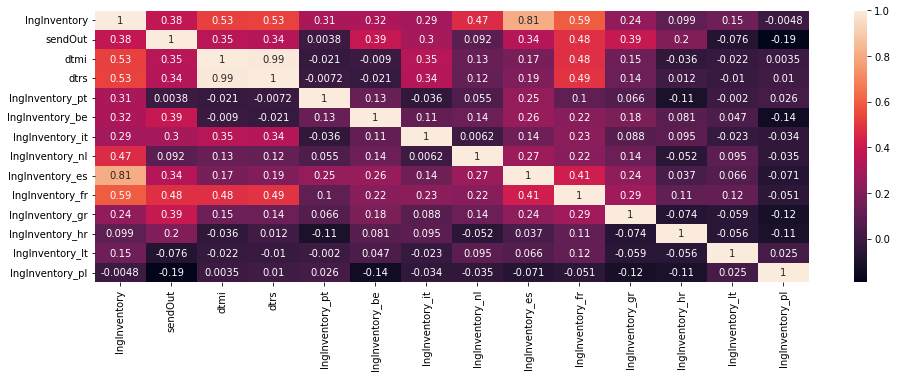

In [826]:
corrMatrix = df_eu.corr()
plt.figure(figsize = (16,5))
sn.heatmap(corrMatrix, annot=True)


In [827]:
del df_eu['status']
del df_eu['info']
df_eu['gasDayStartedOn']=pd.to_datetime(df_eu['gasDayStartedOn'])
df_eu = df_eu.set_index ('gasDayStartedOn', drop = True)
df_eu = df_eu.replace('-', np.nan)

df_eu

,lngInventory,sendOut,dtmi,dtrs,lngInventory_pt,lngInventory_be,lngInventory_it,lngInventory_nl,lngInventory_es,lngInventory_fr,lngInventory_gb,lngInventory_gr,lngInventory_hr,lngInventory_lt,lngInventory_pl
gasDayStartedOn,,,,,,,,,,,,,,,
2012-01-01,3914.31,1791.8,7620.94,5629.1,212.90,195.56,230.97,375.91,1650.79,223.27,894.90,130.00,NaN,NaN,NaN
2012-01-02,4038.22,1913.1,7620.94,5629.1,198.02,322.39,215.75,373.26,1589.90,372.25,839.99,126.66,NaN,NaN,NaN
2012-01-03,3797.68,2193.3,7620.94,5629.1,180.03,297.14,167.28,373.26,1580.63,320.23,760.19,118.92,NaN,NaN,NaN
2012-01-04,3496.63,2196.3,7620.94,5629.1,160.54,259.66,119.26,368.31,1521.34,262.26,693.88,111.38,NaN,NaN,NaN
2012-01-05,3458.69,2061.9,7620.94,5629.1,143.35,229.91,71.00,362.08,1528.91,343.12,674.65,105.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-19,4817.68,3577.0,7464.07,5600.3,228.01,396.42,264.49,224.58,2102.39,1054.50,NaN,133.09,133.5,94.05,186.64
2022-04-20,4848.66,3697.0,7464.07,5600.3,207.43,481.39,303.90,338.72,2134.55,886.01,NaN,133.09,125.9,78.47,159.20
2022-04-21,4431.33,3817.6,7464.07,5600.3,185.41,481.39,249.91,268.90,2018.29,783.78,NaN,133.09,113.4,61.24,135.91


<AxesSubplot:>

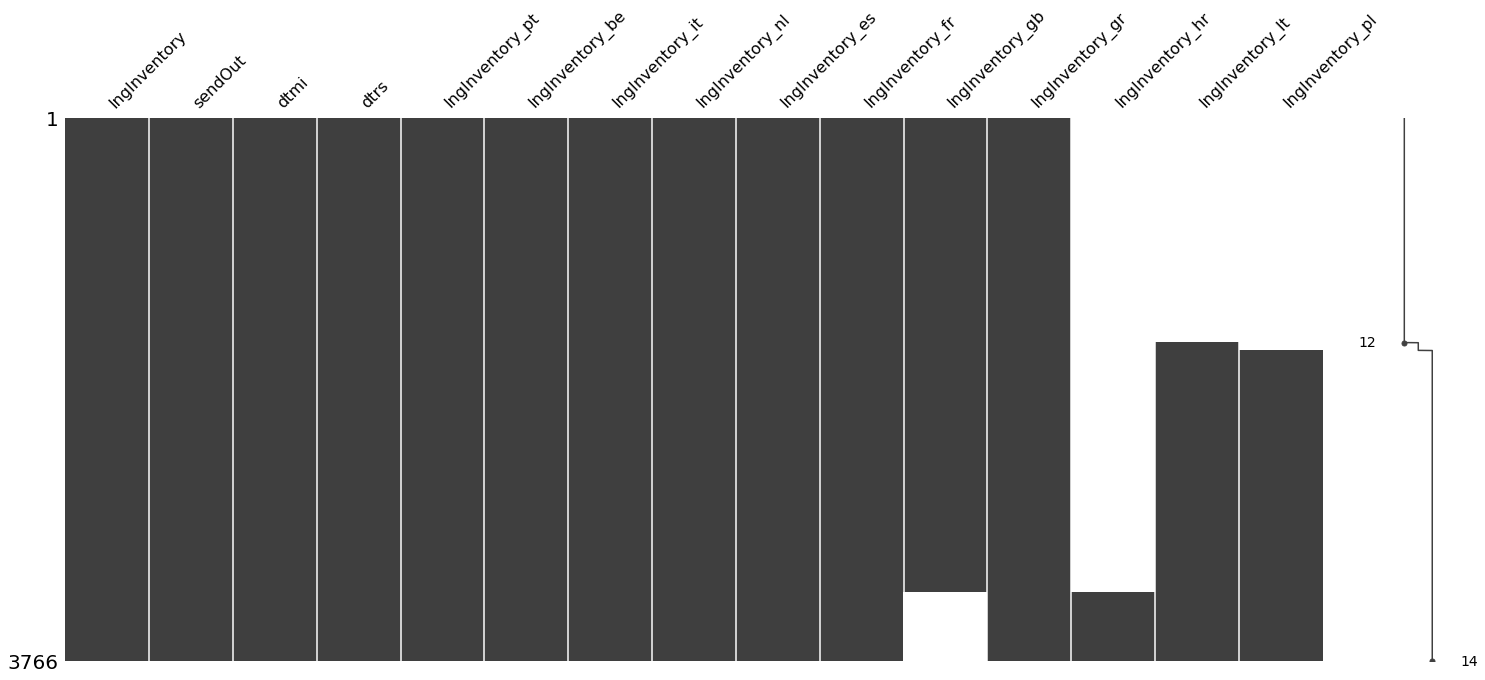

In [828]:
msno.matrix(df_eu)

<AxesSubplot:>

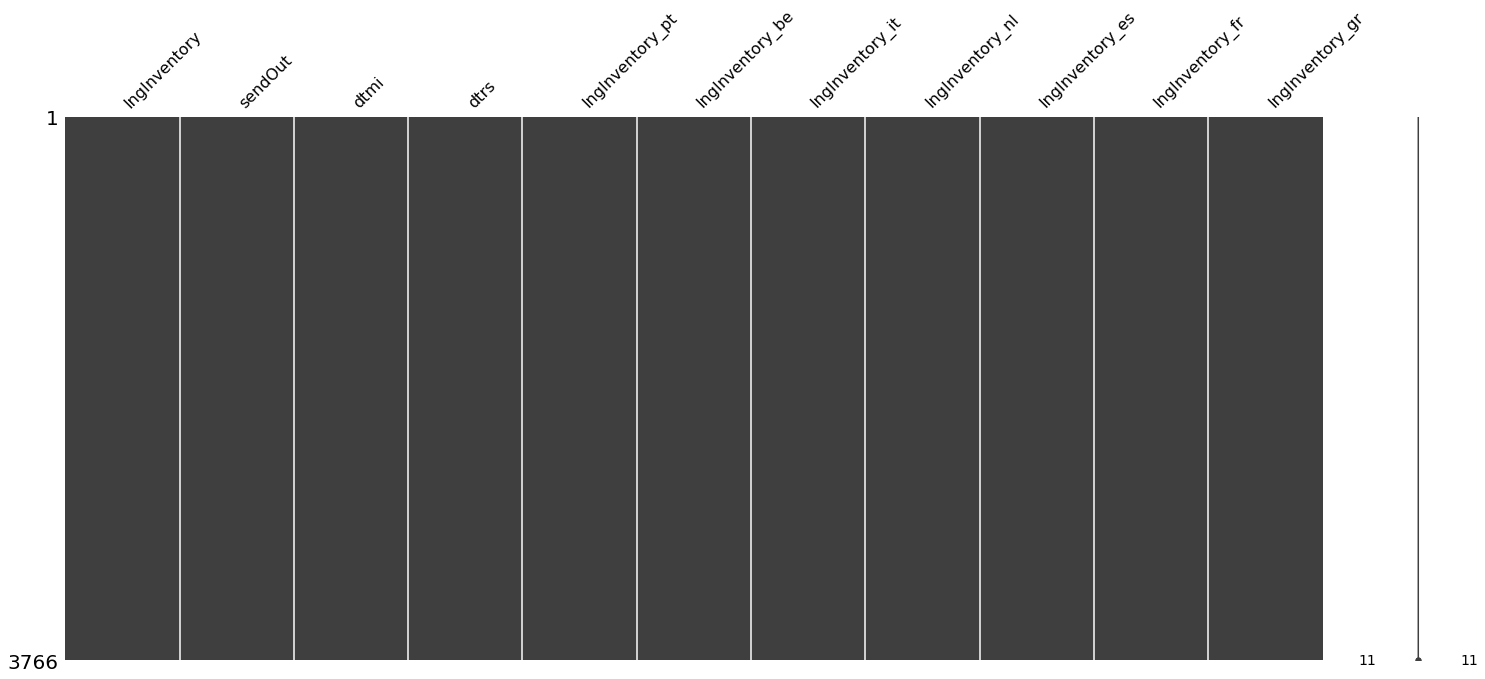

In [829]:
del df_eu['lngInventory_gb'] #new data won't be able available after Brexit --> delete
del df_eu['lngInventory_hr'] #a lot of missing data --> delete
del df_eu['lngInventory_lt'] #a lot of missing data --> delete
del df_eu['lngInventory_pl'] #a lot of missing data --> delete
msno.matrix(df_eu)

In [830]:
X=df_eu.values

Y=X[:,0]
X=X[:,[1,2,3,4,5,6,7,8,9,10]] 
print(Y)
print(X)

[3914.31 4038.22 3797.68 ... 4431.33 4638.21 4280.18]
[[1791.8  7620.94 5629.1  ... 1650.79  223.27  130.  ]
 [1913.1  7620.94 5629.1  ... 1589.9   372.25  126.66]
 [2193.3  7620.94 5629.1  ... 1580.63  320.23  118.92]
 ...
 [3817.6  7464.07 5600.3  ... 2018.29  783.78  133.09]
 [3893.4  7464.07 5600.3  ... 1905.56  885.92  133.09]
 [3636.3  7464.07 5600.3  ... 1820.87  778.32  133.09]]


In [831]:
features=SelectKBest(k=3,score_func=f_regression) # Test different k number of features, uses f-test ANOVA
#features=SelectKBest(k=3,score_func=f_regression)

fit=features.fit(X,Y) #calculates the f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
print(features_results)

[ 627.42885087 1436.03774198 1491.42443104  404.70644241  430.04371036
  347.6747992  1063.55137578 6992.39074846 2019.49881992  239.22992416]
[[5629.1  1650.79  223.27]
 [5629.1  1589.9   372.25]
 [5629.1  1580.63  320.23]
 ...
 [5600.3  2018.29  783.78]
 [5600.3  1905.56  885.92]
 [5600.3  1820.87  778.32]]


<BarContainer object of 10 artists>

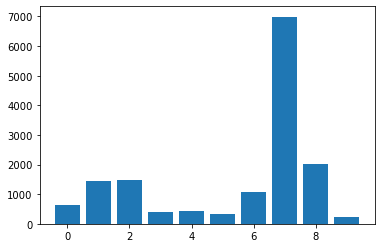

In [832]:
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)

[0.01272699 0.12484241 0.08150943 0.01756271 0.01577074 0.00839615
 0.06734147 0.63129848 0.03185107 0.00870056]


<BarContainer object of 10 artists>

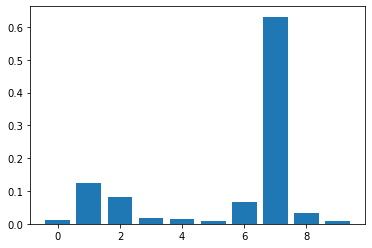

In [833]:
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_) 
plt.bar([i for i in range(len(model.feature_importances_))], model.feature_importances_)

In [834]:
#keep 5 most important features; dtmi, dtrs, nl, es, fr
del df_eu['sendOut'] 
del df_eu['lngInventory_pt']
del df_eu['lngInventory_be']
del df_eu['lngInventory_it']
del df_eu['lngInventory_gr']
df_eu

,lngInventory,dtmi,dtrs,lngInventory_nl,lngInventory_es,lngInventory_fr
gasDayStartedOn,,,,,,
2012-01-01,3914.31,7620.94,5629.1,375.91,1650.79,223.27
2012-01-02,4038.22,7620.94,5629.1,373.26,1589.90,372.25
2012-01-03,3797.68,7620.94,5629.1,373.26,1580.63,320.23
2012-01-04,3496.63,7620.94,5629.1,368.31,1521.34,262.26
2012-01-05,3458.69,7620.94,5629.1,362.08,1528.91,343.12
...,...,...,...,...,...,...
2022-04-19,4817.68,7464.07,5600.3,224.58,2102.39,1054.50
2022-04-20,4848.66,7464.07,5600.3,338.72,2134.55,886.01
2022-04-21,4431.33,7464.07,5600.3,268.90,2018.29,783.78


In [835]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.10, shuffle=False)
print(X_train)
print(y_train)

[[1791.8  7620.94 5629.1  ... 1650.79  223.27  130.  ]
 [1913.1  7620.94 5629.1  ... 1589.9   372.25  126.66]
 [2193.3  7620.94 5629.1  ... 1580.63  320.23  118.92]
 ...
 [3244.5  7435.06 5514.5  ... 1339.43  740.57   87.33]
 [2953.7  7435.06 5514.5  ... 1412.69  726.64   76.5 ]
 [2651.9  7435.06 5514.5  ... 1604.39  618.86  139.55]]
[3914.31 4038.22 3797.68 ... 3051.47 3329.38 3421.35]


In [836]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = regr.predict(X_test)

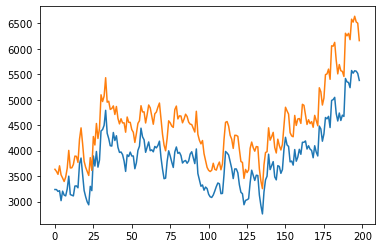

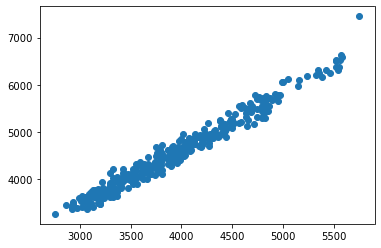

In [837]:
plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

619.3077904511854 414736.36241312674 644.0002813765898 0.16352269527630597 (all)
619.3077904511854 414736.36241312674 644.0002813765898 0.16352269527630597 (5 most imp)

In [838]:
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
print(MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR)

618.002476756617 413058.6318196199 642.6963760747527 0.16295370505108214


In [839]:
NN_model = MLPRegressor(hidden_layer_sizes=(9,9))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)

/Users/vicvanmol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


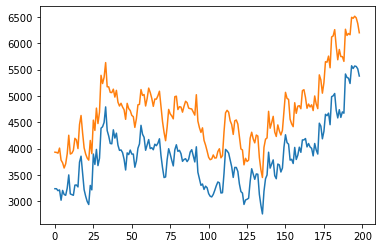

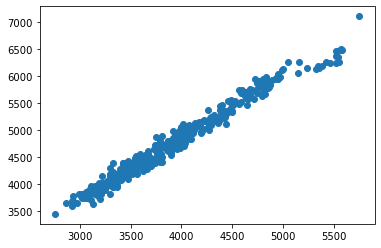

In [840]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

780.4179810998465 640380.1649794632 800.237567838116 0.20319401673944873 (all)
852.8464181832417 744559.2691862292 862.8784788058103 0.21909961630550018 (5 most imp)
777.7308056802968 624211.1560349617 790.0703487886137 0.20031992614056826 (4-4-4)

In [841]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
print(MAE_NN,MSE_NN,RMSE_NN,cvRMSE_NN)

848.4580995400687 738417.0162249535 859.3119434902284 0.21787592119562849


In [808]:
XGB_model = XGBRegressor() 
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

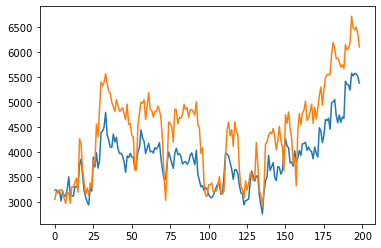

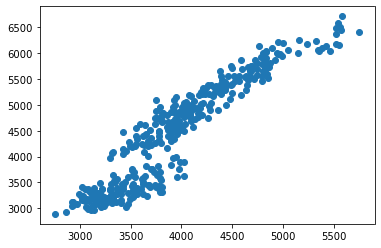

In [809]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

639.6571964367125 560812.4020288136 748.8740895696777 0.190151950379994 (all)
639.6571964367125 560812.4020288136 748.8740895696777 0.190151950379994 (5 most imp)

In [810]:
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
print(MAE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB)

593.6114546636688 493295.96632749814 702.3503159588512 0.17807877948261702


Random Forest

In [811]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model
best_score

NameError: name 'TimeSeriesSplit' is not defined

In [695]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

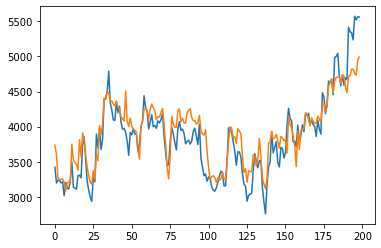

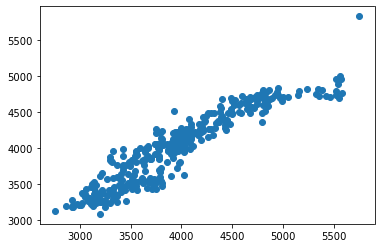

In [696]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

184.75880555776305 58438.591241539114 241.74075213240135 0.06138211502379112 (5 most imp)

In [697]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)

184.75880555776305 58438.591241539114 241.74075213240135 0.06138211502379112


Random forest uniformized

In [698]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [699]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF = RF_model.predict(X_test_scaled)

/var/folders/73/9c46g02s4bb6ngrd002cpt380000gn/T/ipykernel_50334/1024093714.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train_scaled, y_train.reshape(-1,1))


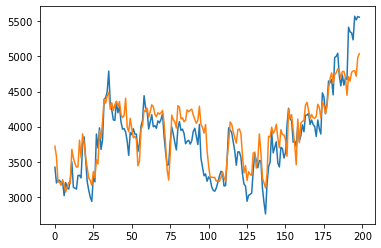

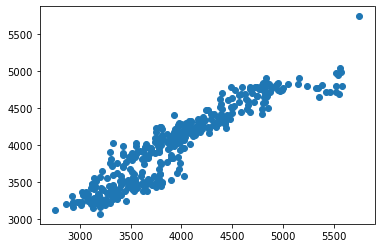

In [700]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

193.19318136194002 60765.43323244576 246.50645677638093 0.0625922090110306 (5 most imp)

In [701]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)

193.19318136194002 60765.43323244576 246.50645677638093 0.0625922090110306


Bootstrapping

In [702]:
BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)

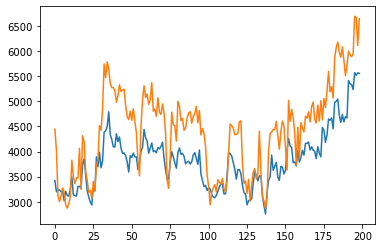

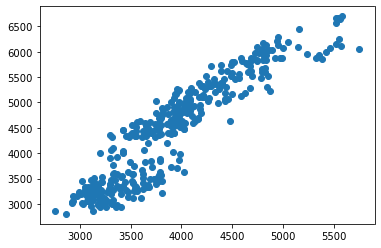

In [703]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [704]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
print(MAE_BT,MSE_BT,RMSE_BT,cvRMSE_BT)

728.5899177718833 723827.8569834667 850.7807337871883 0.21602779175911652
